In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler




In [2]:
# Read the dataset
df = pd.read_csv("/content/Advertising Budget and Sales.csv")



In [3]:
# Display the first ten rows
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
# Display the last rows
df.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# Describe the dataset
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# Get the shape of the dataset
df.shape

(200, 5)

In [7]:
# Get the size of the dataset
df.size

1000

In [8]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# Check for null values
df.isnull()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [12]:
# Total null values (columns)
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [11]:
# Total null values in the dataset
df.isnull().sum().sum()

0

In [13]:
# Get the columns
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

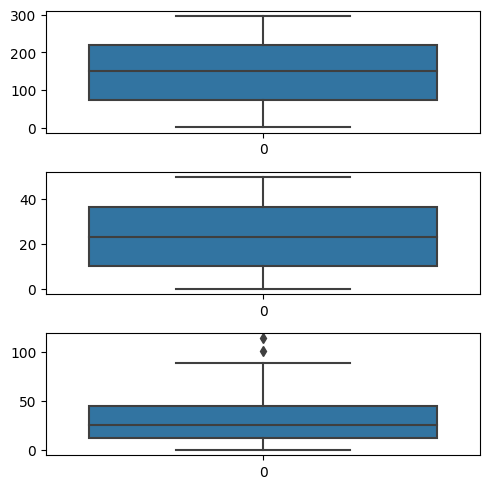

In [15]:
# Visualize outliers using box plots
fig, axis = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(df['TV Ad Budget ($)'], ax=axis[0])
plt2 = sns.boxplot(df['Radio Ad Budget ($)'], ax=axis[1])
plt3 = sns.boxplot(df['Newspaper Ad Budget ($)'], ax=axis[2])
plt.tight_layout()


In [16]:
# Assign variables for feature engineering
x1 = df["TV Ad Budget ($)"]
x2 = df["Newspaper Ad Budget ($)"]
x3 = df["Radio Ad Budget ($)"]
y = df["Sales ($)"]

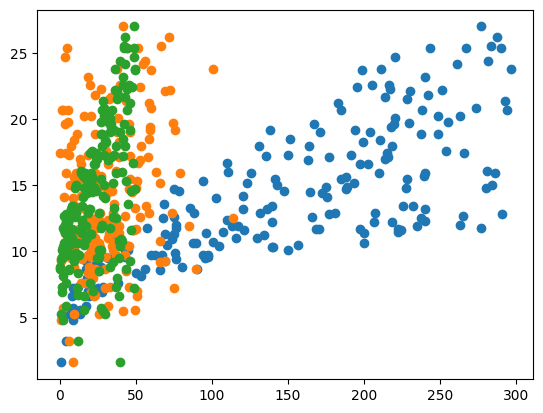

In [17]:
# Plotting the original features
plt.scatter(x1, y)
plt.scatter(x2, y)
plt.scatter(x3, y)

In [18]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x1 = np.array(x1).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)
scaler_x1 = StandardScaler().fit(x1)
scaler_x2 = StandardScaler().fit(x2)
x1_scaled = scaler_x1.transform(x1)
x2_scaled = scaler_x2.transform(x2)

In [19]:
# Feature Engineering
# 1. Interaction Features
df['TV_Radio'] = df['TV Ad Budget ($)'] * df['Radio Ad Budget ($)']
df['TV_Newspaper'] = df['TV Ad Budget ($)'] * df['Newspaper Ad Budget ($)']
df['Radio_Newspaper'] = df['Radio Ad Budget ($)'] * df['Newspaper Ad Budget ($)']


In [20]:
# 2. Polynomial Features (for example, quadratic features)
df['TV^2'] = df['TV Ad Budget ($)']**2
df['Radio^2'] = df['Radio Ad Budget ($)']**2
df['Newspaper^2'] = df['Newspaper Ad Budget ($)']**2

In [21]:
# 3. Log Transformation (if the distribution is skewed)
df['TV_log'] = np.log(df['TV Ad Budget ($)'])
df['Radio_log'] = np.log(df['Radio Ad Budget ($)'])
df['Newspaper_log'] = np.log(df['Newspaper Ad Budget ($)'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
#linear regression
#importing linear regression library
from sklearn.linear_model import LinearRegression
#train test split
from sklearn.model_selection import train_test_split

In [37]:
# Split the data into training and testing sets
X = np.column_stack((x1, x2, x3))  # Use the features you want to include
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [41]:
# Print the model's performance metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 3.174097353976105
R-squared (R2) Score: 0.899438024100912


In [42]:
#the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.04472952 0.00276111 0.18919505]]
Intercept: [2.97906734]
